In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
import pandas as pd

#### Data File

In [2]:
ds = xr.open_dataset('/Users/marki/Downloads/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_allsky_clearsky.nc')

###### Cloud Fraction from 60N to 60S

In [3]:
cldarea_total_mon=ds['cldarea_total_mon'][ : ,30:150, :]
#cldarea_total_mon

###### Cloud fraction in 1D np.ravel

In [4]:
cf=np.ravel(cldarea_total_mon)
#cf

###### Cloud Fraction in actual fraction

In [5]:
c_f=cf/100
#c_f

###### Shortwave (SW) energy leaving the Earth system

In [6]:
toa_sw_all_mon=ds['toa_sw_all_mon'][ : ,30:150, :]
#toa_sw_all_mon

###### SW leaving Earth in 1D np.ravel

In [7]:
sw_leave=np.ravel(toa_sw_all_mon)
#sw_leave

In [8]:
###### Shortwave (SW) incoming from the sun

In [9]:
toa_solar_all_mon=ds['toa_solar_all_mon'][ : ,30:150, :]
#toa_solar_all_mon

###### SW Incoming from the Sun in 1D np.ravel

In [10]:
sw_income=np.ravel(toa_solar_all_mon)
#sw_income

###### Scene albedo is defined as the shortwave (SW) energy leaving the Earth system divided by the SW incoming from the sun


In [11]:
Scene_albedo= sw_leave/sw_income
#Scene_albedo

###### Only non-NaN valuesare valid for both C_F and S_A 

In [12]:
valid = np.logical_and(~np.isnan(c_f),~np.isnan(Scene_albedo))

###### Valid values for C_F and S_A

In [13]:
C_F=c_f[valid]
S_A=Scene_albedo[valid]

##### Calculate values for log of Scene Albedo, Slope and Intercept of Regression Line 

In [14]:
y = np.log(S_A)
x = C_F
slope = np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
intercept = y.mean()-slope*x.mean()
#print(slope)
#print(intercept)

###### Arrange Cloud Fraction Albedo, Slope, Intercept into Exponential Equation

In [15]:
x_values=np.arange(0,1,.01)
Best=np.exp(intercept+slope*x_values)

#### Plot Exponential Least fit Curve against Cloud Fraction vs. Albedo

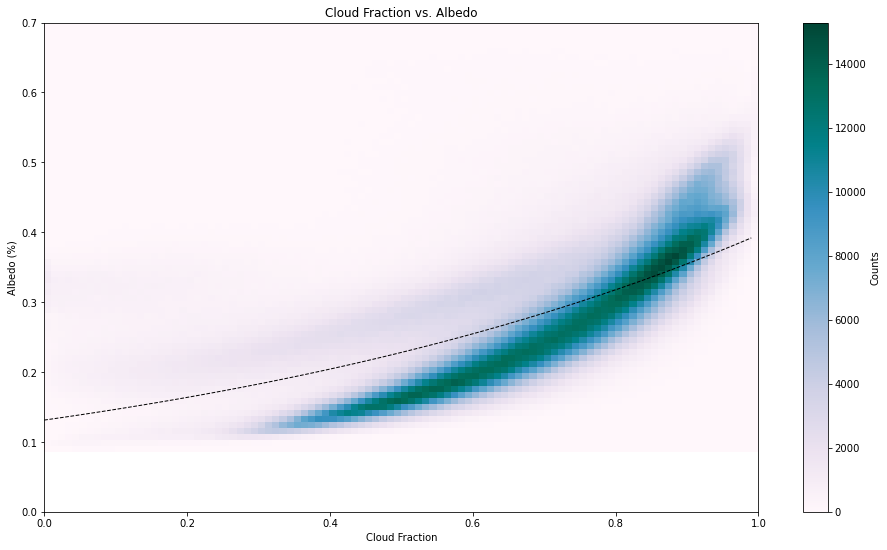

In [19]:
plt.figure(figsize=(16,9))
plt.hist2d(C_F, S_A, bins=100, cmap='PuBuGn')
plt.ylim(0,.7)
plt.plot(x_values, Best,linestyle='--', linewidth=1, color="black")
plt.title('Cloud Fraction vs. Albedo')
plt.xlabel('Cloud Fraction')
plt.ylabel('Albedo (%)')
cbar=plt.colorbar()
cbar.set_label('Counts')